### Step-1: Data Pre-processing Step :


#### importing libraries  :


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

### Import Dataset :

In [49]:
df = pd.read_csv(r"C:\Users\Pallavi Pawara\Documents\LungCapData.csv")

#### View first Top 5 rows :

In [50]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


#### View first Bottom 5 rows :

In [51]:
df.tail()

,LungCap,Age,Height,Smoke,Gender,Caesarean
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no
724,7.100,10,67.7,no,male,no


#### Show column Names :

In [52]:
df.columns

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

#### Get the number of Rows and Columns :

In [53]:
df.shape

(725, 6)

#### Check for any missing(null) values in the dataset :

In [54]:
df.isna().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

#### Show DataTypes :

In [55]:
df.dtypes

LungCap      float64
Age            int64
Height       float64
Smoke         object
Gender        object
Caesarean     object
dtype: object

#### Summary Statistics :

In [56]:
df.describe()

,LungCap,Age,Height
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


#### Check unique value count :

In [57]:
df.nunique()

LungCap      342
Age           17
Height       274
Smoke          2
Gender         2
Caesarean      2
dtype: int64

#### View Some Information :

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


#### View some correlation :

In [59]:
df.corr()

,LungCap,Age,Height
LungCap,1.000000,0.819675,0.912187
Age,0.819675,1.000000,0.835737
Height,0.912187,0.835737,1.000000


#### Visualise Correlation Using Heatmap :

<AxesSubplot:>

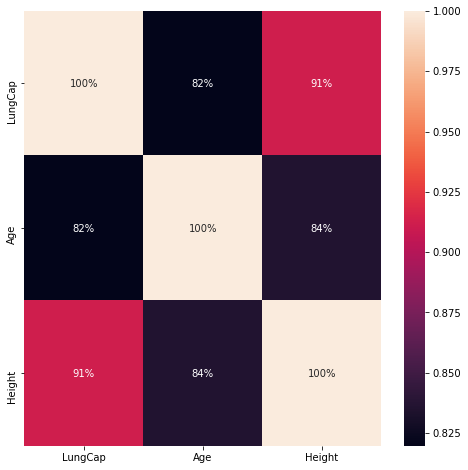

In [60]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr() , annot = True , fmt = '.0%')

#### Plot Graph :

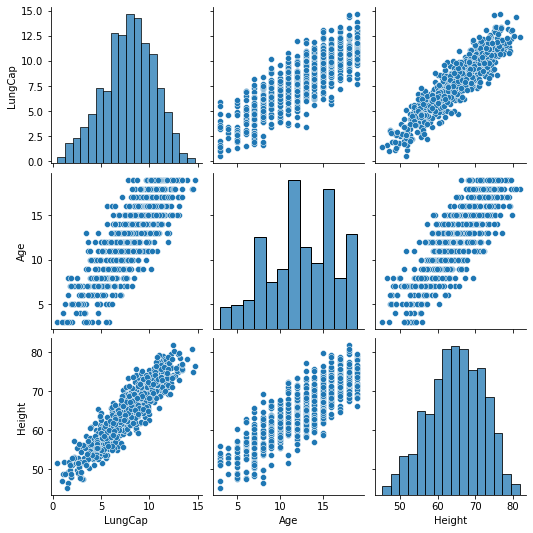

In [61]:
sns.pairplot(df)

In [62]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


#### Convert Non-numeric data into numeric data :

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [64]:
df.Gender = le.fit_transform(df.Gender)
df.Caesarean = le.fit_transform(df.Caesarean)
df.Smoke = le.fit_transform(df.Smoke)

In [65]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


#### Extract Independent and Dependent Variables :

In [66]:
x = df.iloc[:,0:-1]
y = df.iloc[:, 5]

In [67]:
x.head()

,LungCap,Age,Height,Smoke,Gender
0,6.475,6,62.1,0,1
1,10.125,18,74.7,1,0
2,9.550,16,69.7,0,0
3,11.125,14,71.0,0,1
4,4.800,5,56.9,0,1


In [68]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Caesarean, dtype: int32

#### Spliting the dataset into the Training set and Test set :

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25 , random_state = 0)

#### Feature Scaling :

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [71]:
x_train

array([[ 1.15342422,  0.89931977,  1.99858886, -0.33230927,  0.9908339 ],
       [ 1.49298585,  0.39614549,  0.86697282, -0.33230927,  0.9908339 ],
       [-1.81774004, -1.36496447, -1.80140574, -0.33230927,  0.9908339 ],
       ...,
       [-1.59136562, -0.86179019, -1.07493618, -0.33230927, -1.00925089],
       [-0.50665486, -0.10702878, -0.64184856, -0.33230927, -1.00925089],
       [ 1.80425068,  1.65408118,  1.55153067, -0.33230927, -1.00925089]])

In [72]:
x_test

array([[ 1.50241812e+00,  1.15090690e+00,  1.50961897e+00,
        -3.32309265e-01,  9.90833904e-01],
       [-1.95922405e+00, -1.36496447e+00, -1.99699369e+00,
        -3.32309265e-01, -1.00925089e+00],
       [ 3.42249218e-01,  3.96145492e-01,  9.64766801e-01,
        -3.32309265e-01,  9.90833904e-01],
       [-4.12332182e-01,  3.96145492e-01, -3.34496058e-01,
        -3.32309265e-01, -1.00925089e+00],
       [ 7.66701256e-01, -1.07028782e-01,  4.47855771e-01,
        -3.32309265e-01, -1.00925089e+00],
       [ 7.19539918e-01,  1.40249404e+00,  8.11090549e-01,
        -3.32309265e-01,  9.90833904e-01],
       [ 1.93630243e+00,  8.99319767e-01,  1.11844305e+00,
        -3.32309265e-01,  9.90833904e-01],
       [ 1.15874798e-01,  3.96145492e-01,  5.66798566e-02,
        -3.32309265e-01, -1.00925089e+00],
       [-7.27705517e-02,  1.44558355e-01, -4.11141220e-02,
        -3.32309265e-01,  9.90833904e-01],
       [-3.50414817e-02, -6.10203056e-01, -5.30084015e-01,
        -3.32309265e-01

### Step 2) Fitting Random Forest Classifier to the Training Set :

In [73]:
from sklearn.ensemble import RandomForestClassifier
cr = RandomForestClassifier()
cr.fit(x_train, y_train)

RandomForestClassifier()

### Step 3) Prediction of the test set result :

In [74]:
y_pred = cr.predict(x_test)

In [75]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0])

In [76]:
y_test

570    1
497    1
585    0
456    0
258    0
      ..
35     0
434    0
222    1
567    1
77     0
Name: Caesarean, Length: 182, dtype: int32

### Step 3) Creating Confusion Matrix : 

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [78]:
cm

array([[136,   9],
       [ 33,   4]], dtype=int64)

### Step 5) Accuracy :

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7692307692307693

### Step 6) Classification Report :

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       145
           1       0.31      0.11      0.16        37

    accuracy                           0.77       182
   macro avg       0.56      0.52      0.51       182
weighted avg       0.70      0.77      0.72       182



#### ........................................... Thank You ...............................................................